In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
train["brand"] = train["brand"].apply(lambda x: x.replace(' ', ''))
train


,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품,1,90000,9000,3,1,81000
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품,1,39000,3900,1,1,35100
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,175000,17500,3,1,157500
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화,1,455000,45500,3,1,409500
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품,0,100000,10000,3,1,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 13:20,무역점,4241080013074,바닐라,영캐주얼,트랜디 케쥬얼,여성의류,0,120000,0,3,0,120000
1036649,29998,2001-04-07 16:33,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품,0,38000,1900,1,0,36100
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1,0,43700
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1,0,46550


In [3]:
# #환불 내역
train_refund = train[train["amount"]<0]
train_refund

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
18,1,2000-06-17 12:30,본점,4234190015074,바바라,란제리,내의란제리,여성의류,1,-35000,0,1,1,-35000
21,1,2000-06-30 11:20,본점,4229811011200,시슬리,영트랜드,영트렌디,아동,0,-73000,-3650,3,1,-69350
39,2,2000-08-27 19:01,무역점,4301000017000,노티카,트래디셔널,트래디셔널,스포츠캐주얼,0,-434500,-43450,1,1,-391050
46,2,2001-01-03 10:50,무역점,4502161930200,삼성,가전특정,가전,가정용품,0,-1416000,0,6,1,-1416000
60,3,2000-08-27 11:43,천호점,4405620111000,지오다노,영캐쥬얼,영트랜디,영플라자,0,-74600,-3730,3,0,-70870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036572,29995,2000-10-22 14:00,본점,4202285110000,텔레그라프,하이캐쥬얼,여성캐주얼,여성의류,0,-1206000,-60300,1,1,-1145700
1036604,29996,2001-02-15 19:12,무역점,4123660005900,메트로씨티,핸드백,핸드백,명품,0,-205000,-20500,1,0,-184500
1036606,29996,2001-02-21 13:00,무역점,4202204013074,쥬크,영캐주얼,트랜디 케쥬얼,여성의류,0,-156000,0,1,0,-156000
1036614,29996,2001-03-23 12:52,무역점,4123660005900,메트로씨티,핸드백,핸드백,잡화,0,-195000,-19500,1,0,-175500


In [4]:
# # 브랜드별 환불된 횟수
a1 = train_refund.groupby("brand").count()
a1

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,207,207,207,207,207,207,207,207,207,207,207,207,207
1492,50,50,50,50,50,50,50,50,50,50,50,50,50
1492마일즈,94,94,94,94,94,94,94,94,94,94,94,94,94
3N,2,2,2,2,2,2,2,2,2,2,2,2,2
96NY,284,284,284,284,284,284,284,284,284,284,284,284,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,4,4,4,4,4,4,4,4,4,4,4,4,4
휴고보스,41,41,41,41,41,41,41,41,41,41,41,41,41
휴먼앤휴먼,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
# #환불 횟수 탑5 뽑기
a_1 = a1.sort_values('amount', ascending=False).head(5)
a_1


,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765
지오다노,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
폴로,851,851,851,851,851,851,851,851,851,851,851,851,851
시슬리,598,598,598,598,598,598,598,598,598,598,598,598,598
시스템,580,580,580,580,580,580,580,580,580,580,580,580,580


In [5]:
# # 브랜드별 거래 횟수
a2 = train.groupby("brand").count()
a2

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562
1492,768,768,768,768,768,768,768,768,768,768,768,768,768
1492마일즈,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199
3N,22,22,22,22,22,22,22,22,22,22,22,22,22
96NY,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,34,34,34,34,34,34,34,34,34,34,34,34,34
휴고보스,414,414,414,414,414,414,414,414,414,414,414,414,414
휴먼앤휴먼,11,11,11,11,11,11,11,11,11,11,11,11,11


In [8]:
# 브랜드별 거래 횟수 오름차순 정리
a_2 = a2.sort_values('amount', ascending=False)
a_2


,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725
지오다노,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579
랑콤,13151,13151,13151,13151,13151,13151,13151,13151,13151,13151,13151,13151,13151
에스티로더,11801,11801,11801,11801,11801,11801,11801,11801,11801,11801,11801,11801,11801
샤넬,10551,10551,10551,10551,10551,10551,10551,10551,10551,10551,10551,10551,10551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
로얄토파즈,1,1,1,1,1,1,1,1,1,1,1,1,1
엘칸토TK,1,1,1,1,1,1,1,1,1,1,1,1,1
쇼콜라(직배),1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
# a_2 = a_2.reset_index(level=['brand']) # 컬럼으로 다시 전환
a_3 = a_2.loc[["식품","지오다노","폴로","시슬리","시스템"]]
a_3

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725,234725
지오다노,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579,17579
폴로,10174,10174,10174,10174,10174,10174,10174,10174,10174,10174,10174,10174,10174
시슬리,8141,8141,8141,8141,8141,8141,8141,8141,8141,8141,8141,8141,8141
시스템,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393


In [14]:
#브랜드별 환불 비율
s1 = a_1["custid"]/a_3["custid"]
s1 

brand
식품      0.007519
지오다노    0.063257
폴로      0.083645
시슬리     0.073455
시스템     0.132028
Name: custid, dtype: float64

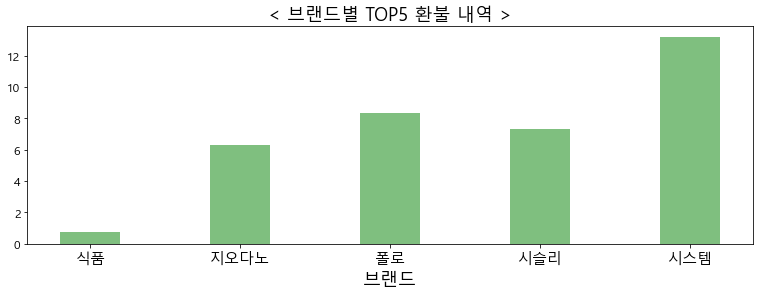

In [16]:
#막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = a_1.index       # x축 항목
y = s1 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 브랜드별 TOP5 환불 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

In [17]:
# 지점별 환불 브랜드
# #환불 내역
train_refund = train[train["amount"]<0]
train_refund

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
18,1,2000-06-17 12:30,본점,4234190015074,바바라,란제리,내의란제리,여성의류,1,-35000,0,1,1,-35000
21,1,2000-06-30 11:20,본점,4229811011200,시슬리,영트랜드,영트렌디,아동,0,-73000,-3650,3,1,-69350
39,2,2000-08-27 19:01,무역점,4301000017000,노티카,트래디셔널,트래디셔널,스포츠캐주얼,0,-434500,-43450,1,1,-391050
46,2,2001-01-03 10:50,무역점,4502161930200,삼성,가전특정,가전,가정용품,0,-1416000,0,6,1,-1416000
60,3,2000-08-27 11:43,천호점,4405620111000,지오다노,영캐쥬얼,영트랜디,영플라자,0,-74600,-3730,3,0,-70870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036572,29995,2000-10-22 14:00,본점,4202285110000,텔레그라프,하이캐쥬얼,여성캐주얼,여성의류,0,-1206000,-60300,1,1,-1145700
1036604,29996,2001-02-15 19:12,무역점,4123660005900,메트로씨티,핸드백,핸드백,명품,0,-205000,-20500,1,0,-184500
1036606,29996,2001-02-21 13:00,무역점,4202204013074,쥬크,영캐주얼,트랜디 케쥬얼,여성의류,0,-156000,0,1,0,-156000
1036614,29996,2001-03-23 12:52,무역점,4123660005900,메트로씨티,핸드백,핸드백,잡화,0,-195000,-19500,1,0,-175500


In [18]:
#지점별 브랜드 환불
# 무역점 환불 top 5
# 본점 환불 top5
# 천호점 환불 top5
# 신촌점 환불 top5

In [20]:
h_1 = train.groupby(["store","brand"]).count()
h_1

custid  date_time  product  corner    pc  part  imported  \
store brand                                                               
무역점   012베네통      612        612      612     612   612   612       612   
      1492마일즈    1003       1003     1003    1003  1003  1003      1003   
      96NY        541        541      541     541   541   541       541   
      A-AND        20         20       20      20    20    20        20   
      AEG          60         60       60      60    60    60        60   
...               ...        ...      ...     ...   ...   ...       ...   
천호점   휠라슈즈        270        270      270     270   270   270       270   
      휠라의류        348        348      348     348   348   348       348   
      휠라인티모        11         11       11      11    11    11        11   
      휠라키즈        239        239      239     239   239   239       239   
      흙침대           6          6        6       6     6     6         6   

               amount  discount  installment  gender  sales  
store brand                                                  
무역점   012베네통      612       612          612     612    612  
      1492마일즈    1003      1003         1003    1003   1003  
      96NY        541       541          541     541    541  
      A-AND        20        20           20      20     20  
      AEG          60        60           60      60     60  
...               ...       ...          ...     ...    ...  
천호점   휠라슈즈        270       270          270     270    270  
      휠라의류        348       348          348     348    348  
      휠라인티모        11        11           11      11     11  
      휠라키즈        239       239          239     239    239  
      흙침대           6         6            6       6      6  

[3971 rows x 12 columns]

In [22]:
h_2 = h_1.reset_index(level=['store']) # 컬럼으로 다시 전환
h_2

,store,custid,date_time,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,무역점,612,612,612,612,612,612,612,612,612,612,612,612
1492마일즈,무역점,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
96NY,무역점,541,541,541,541,541,541,541,541,541,541,541,541
A-AND,무역점,20,20,20,20,20,20,20,20,20,20,20,20
AEG,무역점,60,60,60,60,60,60,60,60,60,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라슈즈,천호점,270,270,270,270,270,270,270,270,270,270,270,270
휠라의류,천호점,348,348,348,348,348,348,348,348,348,348,348,348
휠라인티모,천호점,11,11,11,11,11,11,11,11,11,11,11,11


In [25]:
h_3 = h_1.sort_values(["store"], ascending=True)

In [26]:
h_3

custid  date_time  product  corner   pc  part  imported  \
store brand                                                              
무역점   012베네통      612        612      612     612  612   612       612   
      영이그린          2          2        2       2    2     2         2   
      영창           31         31       31      31   31    31        31   
      예(Ye)소품      14         14       14      14   14    14        14   
      예세/알레시       85         85       85      85   85    85        85   
...               ...        ...      ...     ...  ...   ...       ...   
천호점   밀란모빌          1          1        1       1    1     1         1   
      밀레           19         19       19      19   19    19        19   
      밀로스         102        102      102     102  102   102       102   
      미쏘니수영복       74         74       74      74   74    74        74   
      흙침대           6          6        6       6    6     6         6   

               amount  discount  installment  gender  sales  
store brand                                                  
무역점   012베네통      612       612          612     612    612  
      영이그린          2         2            2       2      2  
      영창           31        31           31      31     31  
      예(Ye)소품      14        14           14      14     14  
      예세/알레시       85        85           85      85     85  
...               ...       ...          ...     ...    ...  
천호점   밀란모빌          1         1            1       1      1  
      밀레           19        19           19      19     19  
      밀로스         102       102          102     102    102  
      미쏘니수영복       74        74           74      74     74  
      흙침대           6         6            6       6      6  

[3971 rows x 12 columns]

In [30]:
h_4 = train[train["store"] == "본점"]
# train[train["brand"] == "루이비통"].head(10)
h_4

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,175000,17500,3,1,157500
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화,1,455000,45500,3,1,409500
7,0,2000-12-13 19:20,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,96000,9600,3,1,86400
8,0,2000-12-22 19:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,166000,16600,3,1,149400
9,0,2000-12-29 19:00,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,96000,9600,3,1,86400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036624,29997,2001-03-24 15:20,본점,2116053008000,바비브라운,수입종합화장품,화장품,잡화,0,30000,3000,1,1,27000
1036625,29997,2001-03-24 15:30,본점,4120440000800,싹스탑양말,양말,섬유잡화,잡화,0,9000,900,1,1,8100
1036626,29997,2001-03-24 16:40,본점,6141400010000,로에베현대본점,수입의류,명품토탈,잡화,0,68000,0,1,1,68000
1036631,29997,2001-04-14 14:40,본점,4125900006620,쟝폴클라리쎄,헤어ACC,장신구,잡화,0,52000,0,1,1,52000


In [32]:
#본점 브랜드별 거래량
h_5 = h_4.groupby("brand").count()
h_5

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
96NY,856,856,856,856,856,856,856,856,856,856,856,856,856
AEG,85,85,85,85,85,85,85,85,85,85,85,85,85
AQ넥타이,243,243,243,243,243,243,243,243,243,243,243,243,243
CK,266,266,266,266,266,266,266,266,266,266,266,266,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
황하,9,9,9,9,9,9,9,9,9,9,9,9,9
후버,39,39,39,39,39,39,39,39,39,39,39,39,39
훼이버릿,21,21,21,21,21,21,21,21,21,21,21,21,21


In [34]:
# 본점 거래량 오름차순
h_6= h_5.sort_values('amount', ascending=False)
h_6

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262
샤넬,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630
지오다노,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512
폴로,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738
아베다,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
금사랑준보석,1,1,1,1,1,1,1,1,1,1,1,1,1
아르모니아,1,1,1,1,1,1,1,1,1,1,1,1,1
에르도스,1,1,1,1,1,1,1,1,1,1,1,1,1


In [53]:
# 본점 브랜드별 거래량 
h_7 = h_6.sort_values('amount', ascending=False)
h_7

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262
샤넬,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630
지오다노,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512
폴로,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738
아베다,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
김혜련,1,1,1,1,1,1,1,1,1,1,1,1,1
주니데꼬,1,1,1,1,1,1,1,1,1,1,1,1,1
오닐,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
#식품 제외
# h_7.drop(["식품"], inplace=True)

KeyError: "['식품'] not found in axis"

In [42]:
# h_7

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
샤넬,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630
지오다노,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512
폴로,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738
아베다,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614
랑콤,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550


In [47]:
# 환불 브랜드
h_8 = train_refund.groupby("brand").count()
h_8
# a1 = train_refund.groupby("brand").count()

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,207,207,207,207,207,207,207,207,207,207,207,207,207
1492,50,50,50,50,50,50,50,50,50,50,50,50,50
1492마일즈,94,94,94,94,94,94,94,94,94,94,94,94,94
3N,2,2,2,2,2,2,2,2,2,2,2,2,2
96NY,284,284,284,284,284,284,284,284,284,284,284,284,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,4,4,4,4,4,4,4,4,4,4,4,4,4
휴고보스,41,41,41,41,41,41,41,41,41,41,41,41,41
휴먼앤휴먼,1,1,1,1,1,1,1,1,1,1,1,1,1


In [48]:
# 환불 top5
h_9 = h_8.sort_values('amount', ascending=False).head(5)
h_9

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765
지오다노,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
폴로,851,851,851,851,851,851,851,851,851,851,851,851,851
시슬리,598,598,598,598,598,598,598,598,598,598,598,598,598
시스템,580,580,580,580,580,580,580,580,580,580,580,580,580


In [54]:
# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
h_10 = h_7.loc[["식품","지오다노","폴로","시슬리","시스템"]]
h_10

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262,76262
지오다노,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512
폴로,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738,3738
시슬리,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072
시스템,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360


In [55]:
s2 = h_9["custid"]/h_10["custid"]
s2

brand
식품      0.023144
지오다노    0.246454
폴로      0.227662
시슬리     0.194661
시스템     0.426471
Name: custid, dtype: float64

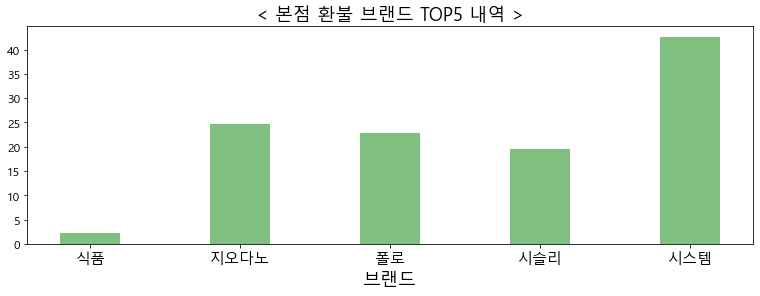

In [57]:
#막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = h_9.index       # x축 항목
y = s2 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 본점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

brand
식품          0.006847
지오다노        0.055261
폴로          0.078872
밀라노스토리무역    0.133749
시스템         0.127313
Name: custid, dtype: float64


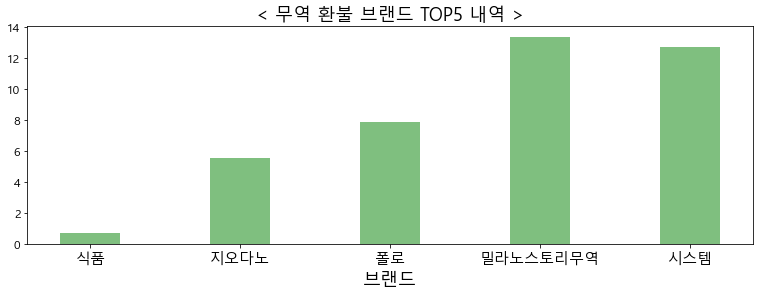

In [2]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')

# 무역점 데이터만 가져오기
m_1 = train[train["store"] == "무역점"]
# m_1

# 본점 브랜드별 거래량
m_2 = m_1.groupby("brand").count()
# m_2

# 환불 내역
train_refund = m_1[m_1["amount"]<0]
# train_refund

# 환불 브랜드
m_3 = train_refund.groupby("brand").count()
# m_3

# 환불 브랜드 top5
m_4 = m_3.sort_values('amount', ascending=False).head(5)
# m_4

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
m_5 = m_2.loc[["식품","지오다노","폴로","밀라노스토리무역","시스템"]]
# m_5

s3 = m_4["custid"]/m_5["custid"]
print(s3)

# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = m_4.index       # x축 항목
y = s3 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 무역 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

In [2]:
# 신촌점 데이터만 가져오기
sh_1 = train[train["store"] == "신촌점"]
sh_1

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
85,5,2000-06-29 19:02,신촌점,4409230020400,팅클,유아,아동,아동,0,74000,7400,1,1,66600
86,5,2000-06-29 19:12,신촌점,4400202022000,쇼콜라,미확인코너,아동,아동,0,76500,7650,1,1,68850
87,5,2000-07-07 19:00,신촌점,4400040020030,모다까리나,아동,아동,아동,0,40800,0,1,1,40800
88,5,2000-07-07 19:10,신촌점,4400040020030,모다까리나,아동,아동,아동,0,200000,0,3,1,200000
123,6,2000-08-12 18:42,신촌점,4405551020000,톰키드,아동,아동,아동,0,49500,4950,1,1,44550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036459,29992,2001-02-27 19:10,신촌점,4125900006670,쟝폴클라쎄,헤어ACC,장신구,잡화,0,10000,0,1,0,10000
1036461,29992,2001-03-17 18:44,신촌점,4242250011000,베네통,영커리어캐주얼,어덜트캐주얼,영플라자,0,95000,9500,3,0,85500
1036462,29992,2001-03-27 18:43,신촌점,4405620026000,지오다노,영캐주얼,영캐주얼,영플라자,0,39800,1990,1,0,37810
1036463,29992,2001-04-05 18:40,신촌점,4218910015075,비비안,란제리,타운란제리,여성의류,0,19500,0,1,0,19500


In [3]:
# 본점 브랜드별 거래량
sh_2 = sh_1.groupby("brand").count()
sh_2


,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,437,437,437,437,437,437,437,437,437,437,437,437,437
1492,768,768,768,768,768,768,768,768,768,768,768,768,768
3N,22,22,22,22,22,22,22,22,22,22,22,22,22
96NY,504,504,504,504,504,504,504,504,504,504,504,504,504
A-AND,69,69,69,69,69,69,69,69,69,69,69,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라인티모,16,16,16,16,16,16,16,16,16,16,16,16,16
휠라키즈,209,209,209,209,209,209,209,209,209,209,209,209,209
휠라행사,34,34,34,34,34,34,34,34,34,34,34,34,34


In [4]:
# 환불 내역
train_refund = sh_1[sh_1["amount"]<0]
train_refund


,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
401,13,2000-08-10 14:40,신촌점,4208790026000,쿠기,영캐주얼,영캐주얼,영플라자,0,-88000,0,3,0,-88000
444,13,2000-11-18 18:40,신촌점,4309170019972,라일앤스콧,트레디셔널캐주얼,트래디셔널,스포츠캐주얼,0,-92000,0,3,0,-92000
454,13,2000-12-10 18:50,신촌점,4407072126010,FUBU,스포츠캐주얼,진캐주얼,영플라자,0,-89100,0,1,0,-89100
481,13,2001-01-29 17:40,신촌점,6318225019900,빈폴,트레디셔널캐주얼,트래디셔널,스포츠캐주얼,0,-442000,-22100,3,0,-419900
500,13,2001-04-29 18:20,신촌점,4243560013074,울티모,TOP디자이너,디자이너부띠끄,여성의류,0,-497000,0,3,0,-497000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036042,29978,2000-12-28 14:13,신촌점,4409440022000,오르화,미확인코너,아동,아동,0,-173000,-8650,6,0,-164350
1036060,29978,2001-04-03 18:33,신촌점,4407072126000,FUBU,스포츠캐주얼,진캐주얼,영플라자,0,-149000,-7450,6,0,-141550
1036061,29978,2001-04-05 13:53,신촌점,4408160027000,노스페이스,아웃도어,스포츠,스포츠캐주얼,1,-180000,-9000,6,0,-171000
1036062,29978,2001-04-05 14:00,신촌점,4309170019972,라일앤스콧,트레디셔널캐주얼,트래디셔널,스포츠캐주얼,0,-40000,0,1,0,-40000


In [5]:
# 환불 브랜드
sh_3 = train_refund.groupby("brand").count()
sh_3
# y = train_refund[train_refund["brand"]=="신촌"]
# y

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,20,20,20,20,20,20,20,20,20,20,20,20,20
1492,50,50,50,50,50,50,50,50,50,50,50,50,50
3N,2,2,2,2,2,2,2,2,2,2,2,2,2
96NY,66,66,66,66,66,66,66,66,66,66,66,66,66
A-AND,7,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라의류,39,39,39,39,39,39,39,39,39,39,39,39,39
휠라키즈,14,14,14,14,14,14,14,14,14,14,14,14,14
휠라행사,4,4,4,4,4,4,4,4,4,4,4,4,4


In [6]:
# 환불 브랜드 top5
sh_4 = sh_3.sort_values('amount', ascending=False).head(5)
sh_4

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,460,460,460,460,460,460,460,460,460,460,460,460,460
지오다노,256,256,256,256,256,256,256,256,256,256,256,256,256
에스티로더,162,162,162,162,162,162,162,162,162,162,162,162,162
밀라노신촌,144,144,144,144,144,144,144,144,144,144,144,144,144
크리니크,144,144,144,144,144,144,144,144,144,144,144,144,144


In [60]:
# y = sh_4.reset_index(level=['brand'])
# y

,brand,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
0,식품,460,460,460,460,460,460,460,460,460,460,460,460,460
1,지오다노,256,256,256,256,256,256,256,256,256,256,256,256,256
2,에스티로더,162,162,162,162,162,162,162,162,162,162,162,162,162
3,밀라노 신촌,144,144,144,144,144,144,144,144,144,144,144,144,144
4,크리니크,144,144,144,144,144,144,144,144,144,144,144,144,144
5,폴로,144,144,144,144,144,144,144,144,144,144,144,144,144
6,피에르가르뎅,130,130,130,130,130,130,130,130,130,130,130,130,130


In [63]:
# z = sh_3.loc[["폴로"]]
# z

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
폴로,144,144,144,144,144,144,144,144,144,144,144,144,144


In [7]:
# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
sh_5 = sh_2.loc[["식품","지오다노","에스티로더","밀라노신촌","크리니크"]]
sh_5

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,53957,53957,53957,53957,53957,53957,53957,53957,53957,53957,53957,53957,53957
지오다노,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218
에스티로더,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016
밀라노신촌,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
크리니크,3194,3194,3194,3194,3194,3194,3194,3194,3194,3194,3194,3194,3194


In [8]:
s4 = sh_4["custid"]/sh_5["custid"]
s4

brand
식품       0.008525
지오다노     0.060692
에스티로더    0.053714
밀라노신촌    0.140488
크리니크     0.045085
Name: custid, dtype: float64

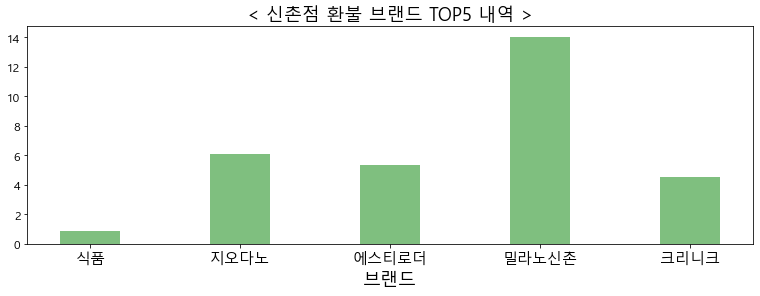

In [9]:
# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = sh_4.index       # x축 항목
y = s4 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 신촌점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

In [10]:
# 천호점 데이터만 가져오기
ch_1 = train[train["store"] == "천호점"]
ch_1

# # 천호 브랜드별 거래량
# ch_2 = ch_1.groupby("brand").count()
# # ch_2

# # 환불 내역
# train_refund = sh_1[sh_1["amount"]<0]
# # train_refund

# # 환불 브랜드
# ch_3 = train_refund.groupby("brand").count()
# # ch_3

# # 환불 브랜드 top5
# ch_4 = ch_3.sort_values('amount', ascending=False).head(5)
# # ch_4

# # 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
# ch_5 = ch_2.loc[["식품","지오다노","에스티로더","밀라노신촌","크리니크"]]
# # ch_5


,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
42,2,2000-10-11 16:51,천호점,4400213022910,압소바,유아복,유아/완구,아동,0,211350,21140,3,1,190210
43,2,2000-10-11 17:21,천호점,2116052008000,크리니크,수입종합화장품,화장품,잡화,1,146000,14600,1,1,131400
44,2,2000-11-05 11:41,천호점,4134870003200,이사벨,캐릭터슈즈,패션슈즈,영플라자,0,232000,23200,3,1,208800
48,3,2000-05-13 18:00,천호점,4226470013074,마리앙쥬,행사,영트랜디,영플라자,0,77000,0,3,0,77000
49,3,2000-05-13 18:10,천호점,4226470013074,마리앙쥬,행사,영트랜디,영플라자,0,94000,0,3,0,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036518,29994,2001-04-18 19:23,천호점,4129790208400,네일엘레강스,미확인코너,엘레강스캐쥬얼,여성의류,0,15000,750,1,0,14250
1036519,29994,2001-04-18 19:40,천호점,2700000000000,식품,면류,일반식품,공산품,0,30600,0,1,0,30600
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1,0,43700
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1,0,46550


In [11]:
# # 천호 브랜드별 거래량
ch_2 = ch_1.groupby("brand").count()
ch_2


,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,420,420,420,420,420,420,420,420,420,420,420,420,420
1492마일즈,196,196,196,196,196,196,196,196,196,196,196,196,196
96NY,272,272,272,272,272,272,272,272,272,272,272,272,272
@one,2,2,2,2,2,2,2,2,2,2,2,2,2
A-AND,118,118,118,118,118,118,118,118,118,118,118,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라슈즈,270,270,270,270,270,270,270,270,270,270,270,270,270
휠라의류,348,348,348,348,348,348,348,348,348,348,348,348,348
휠라인티모,11,11,11,11,11,11,11,11,11,11,11,11,11


In [15]:
# # 환불 내역
train_refund = ch_1[ch_1["amount"]<0]
train_refund


,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,sales
60,3,2000-08-27 11:43,천호점,4405620111000,지오다노,영캐쥬얼,영트랜디,영플라자,0,-74600,-3730,3,0,-70870
77,3,2001-04-09 16:53,천호점,4202285010000,텔레그라프,캐릭터캐쥬얼,영캐릭터캐쥬얼,영플라자,0,-621000,-31050,5,0,-589950
367,12,2001-04-03 13:50,천호점,4229040013074,앙스모드,디자이너캐릭터,디자이너부틱,여성의류,0,-199000,0,3,1,-199000
369,12,2001-04-07 18:00,천호점,4217850113074,손정완,의류기타,로얄부틱,명품,0,-436000,0,3,1,-436000
372,12,2001-04-07 19:10,천호점,4218730110000,레지나,미확인코너,미씨캐릭터,여성의류,0,-79000,-3950,3,1,-75050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034893,29935,2000-07-09 16:50,천호점,6123900003020,엘칸토현금,임대슈즈,패션슈즈,영플라자,0,-20000,0,1,1,-20000
1035443,29957,2000-10-27 19:23,천호점,4405620111000,지오다노,용기보증,미확인pc,영플라자,0,-52700,-2630,3,0,-50070
1035534,29960,2000-05-05 12:04,천호점,4529760147200,한성아이티씨,카페트,침구/수예,가정용품,0,-515790,-25790,3,0,-490000
1035546,29960,2000-09-17 12:10,천호점,4400060020470,피에르가르뎅,아동복,아동,아동,0,-49000,0,1,0,-49000


In [16]:
# # 환불 브랜드
ch_3 = train_refund.groupby("brand").count()
ch_3

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
012베네통,37,37,37,37,37,37,37,37,37,37,37,37,37
1492마일즈,16,16,16,16,16,16,16,16,16,16,16,16,16
96NY,40,40,40,40,40,40,40,40,40,40,40,40,40
A-AND,14,14,14,14,14,14,14,14,14,14,14,14,14
ABFZ,65,65,65,65,65,65,65,65,65,65,65,65,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
훌라,4,4,4,4,4,4,4,4,4,4,4,4,4
휀시구두,1,1,1,1,1,1,1,1,1,1,1,1,1
휠라슈즈,14,14,14,14,14,14,14,14,14,14,14,14,14


In [17]:
# 환불 브랜드 top5
ch_4 = ch_3.sort_values('amount', ascending=False).head(5)
ch_4

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,434,434,434,434,434,434,434,434,434,434,434,434,434
지오다노,306,306,306,306,306,306,306,306,306,306,306,306,306
피에르가르뎅,159,159,159,159,159,159,159,159,159,159,159,159,159
NII,149,149,149,149,149,149,149,149,149,149,149,149,149
시슬리,142,142,142,142,142,142,142,142,142,142,142,142,142


In [18]:
# # 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
ch_5 = ch_2.loc[["식품","지오다노","피에르가르뎅","NII","시슬리"]]
ch_5

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender,sales
brand,,,,,,,,,,,,,
식품,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731
지오다노,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
피에르가르뎅,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447
NII,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
시슬리,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511


In [22]:
s5 = ch_4["custid"]/ch_5["custid"]
s5

brand
식품        0.010157
지오다노      0.077567
피에르가르뎅    0.109883
NII       0.095208
시슬리       0.093977
Name: custid, dtype: float64

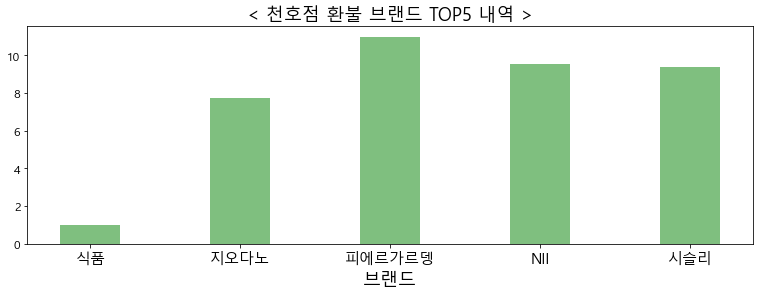

In [23]:
# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = ch_4.index       # x축 항목
y = s5 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 천호점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()